In [1814]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-v0_8-notebook') #Style sheet

# Load the dataframes

In [1815]:
cash = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fee = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [1816]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [1817]:
cash.tail(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN
23969,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,NaN,instant,2020-10-08 14:17:04.526139+00,NaN,NaN,NaN


In [1818]:
fee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [1819]:
fee.head(5)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [1820]:
# Cash To datetime
cash[['created_at', 'updated_at', 'moderated_at', 'reimbursement_date', 
      'cash_request_received_date', 'money_back_date', 'send_at', 
      'reco_creation', 'reco_last_update']] = cash[['created_at', 'updated_at', 'moderated_at', 
                                                    'reimbursement_date', 'cash_request_received_date', 
                                                    'money_back_date', 'send_at', 'reco_creation', 
                                                    'reco_last_update']].apply(pd.to_datetime, format="ISO8601")

In [1821]:
# Fee to datetime
fee[["created_at", "updated_at", "paid_at", 
     "from_date", "to_date"]] = fee[["created_at", "updated_at", 
                                     "paid_at", "from_date", "to_date"]].apply(pd.to_datetime, format="ISO8601")

# Clean Data

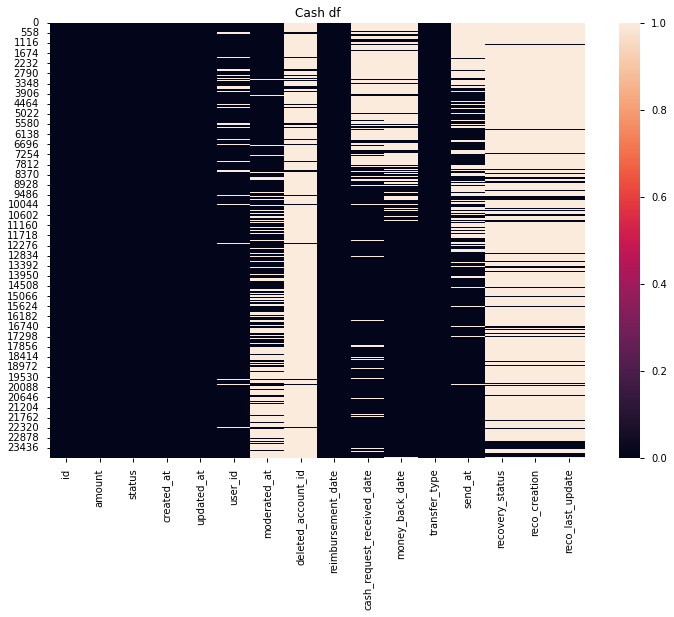

In [1822]:
# Plotting null values
plt.figure(figsize=(12,8))
sns.heatmap(cash.isnull())
plt.title('Cash df')
plt.show();

In [1823]:
fee.columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

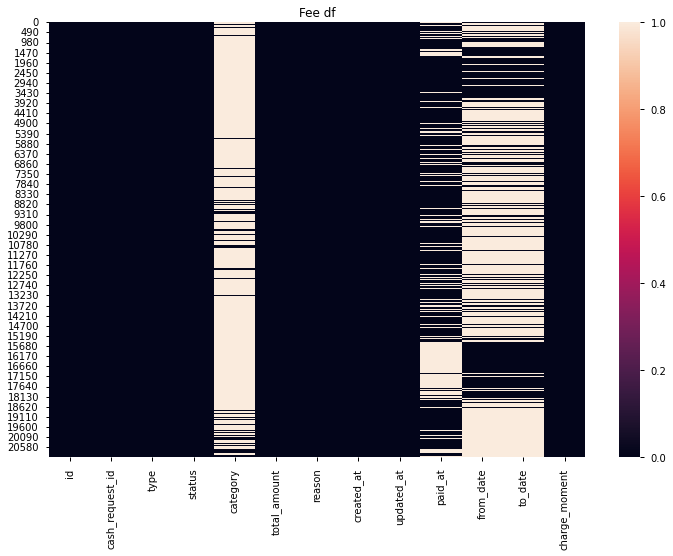

In [1824]:
# Plotting null values
plt.figure(figsize=(12,8))
sns.heatmap(fee.isnull())
plt.title('Fee df')
plt.show();

# EDA

<Axes: xlabel='status'>

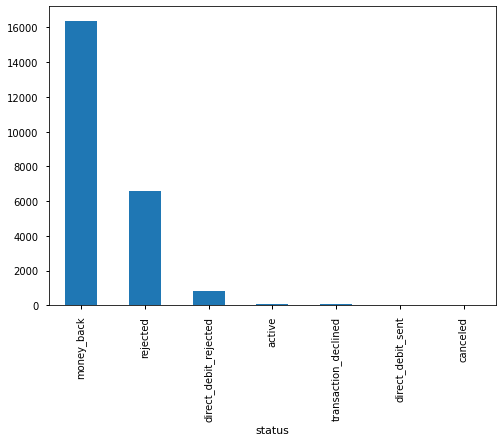

In [1825]:
cash['status'].value_counts().plot(kind='bar')

<Axes: xlabel='amount', ylabel='Count'>

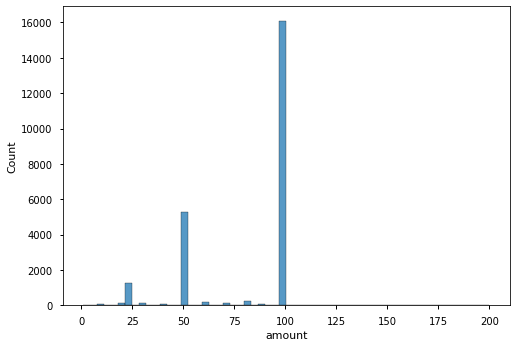

In [1826]:
sns.histplot(cash['amount'])

In [1827]:
fee['total_amount'].value_counts()

total_amount
5.0     21060
10.0        1
Name: count, dtype: int64

<Axes: xlabel='status'>

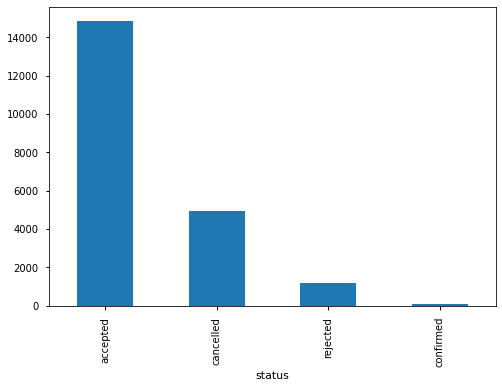

In [1828]:
fee['status'].value_counts().plot(kind='bar')

<Axes: xlabel='category'>

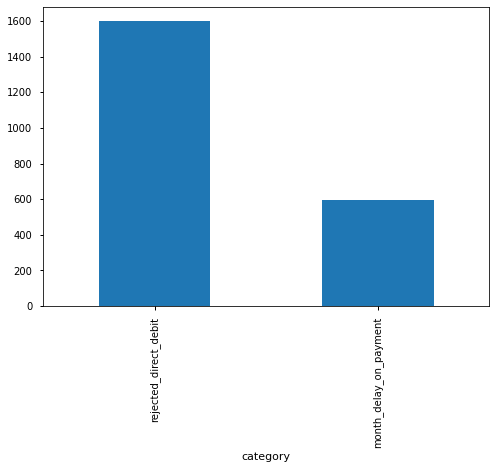

In [1829]:
fee['category'].value_counts().plot(kind='bar')

# Cohorts by first transaction

In [1830]:
# Cohorts
cash['month'] = cash['created_at'].dt.to_period('M')
cash['cohort'] = cash.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
cash.head(5)

/tmp/ipykernel_989/3976378994.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['month'] = cash['created_at'].dt.to_period('M')
/tmp/ipykernel_989/3976378994.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['cohort'] = cash.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,month,cohort
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,2019-12-11 14:24:22.897988+00:00,NaN,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761.0,2019-12-18 14:26:18.128407+00:00,NaN,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686.0,2020-05-07 09:21:55.320193+00:00,NaN,2020-06-05 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-05,2020-05


## Clients per Cohort

Text(0.5, 1.0, 'Clients per Cohort')

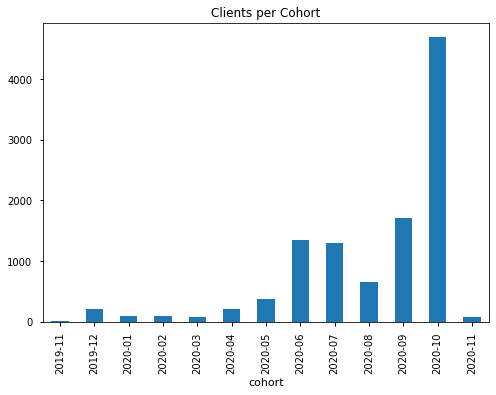

In [1831]:
# Clients per cohort
cohort_clients = cash.groupby('cohort')['user_id'].nunique()
cohort_clients.plot(kind='bar')
plt.title('Clients per Cohort')

## Transactions per Cohort

Text(0.5, 1.0, 'Events per Cohort')

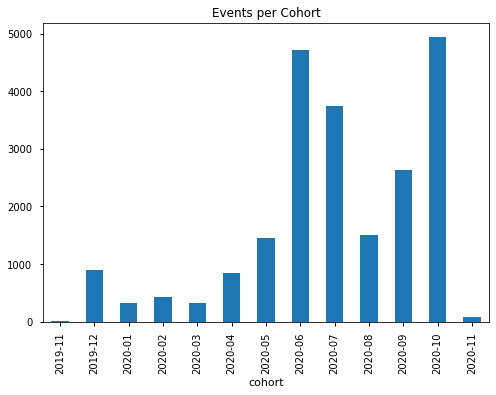

In [1832]:
# Transactions per cohort
cohort_events = cash.groupby('cohort')['id'].nunique()
cohort_events.plot(kind='bar')
plt.title('Events per Cohort')

In [1833]:
# Cohort Clients monthly
cohort_clients_monthly = cash.groupby(['cohort', 'month']).agg(n_clients=('user_id', 'nunique')).reset_index()
cohort_clients_monthly

,cohort,month,n_clients
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,660
79,2020-09,2020-11,20
80,2020-10,2020-10,4694
81,2020-10,2020-11,15


## Total Amount Request per Cohort

In [1834]:
cohort_amount_request = cash.groupby('cohort').agg(amount_request=('amount', 'sum')).reset_index()
cohort_amount_request

,cohort,amount_request
0,2019-11,232.0
1,2019-12,84781.0
2,2020-01,31104.0
3,2020-02,39777.0
4,2020-03,31555.0
5,2020-04,79244.0
6,2020-05,134658.0
7,2020-06,425531.0
8,2020-07,320877.0
9,2020-08,116750.0


## Total Fee per Cohort

In [1835]:
cohort_df = pd.DataFrame(cash[['id', 'user_id', 'cohort']])

fee = fee.merge(cohort_df, left_on='cash_request_id', right_on='id', how='left')
fee.drop(columns='id_y', inplace=True)
fee.rename(columns={'id_x':'id'}, inplace=True)

<Axes: >

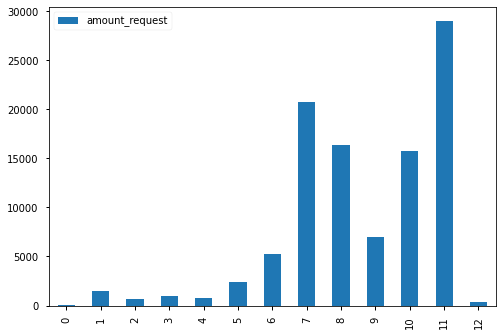

In [1836]:
cohort_total_fee = fee.groupby('cohort').agg(amount_request=('total_amount', 'sum')).reset_index()
cohort_total_fee.plot(kind='bar')

## Retention Rate per Cohort

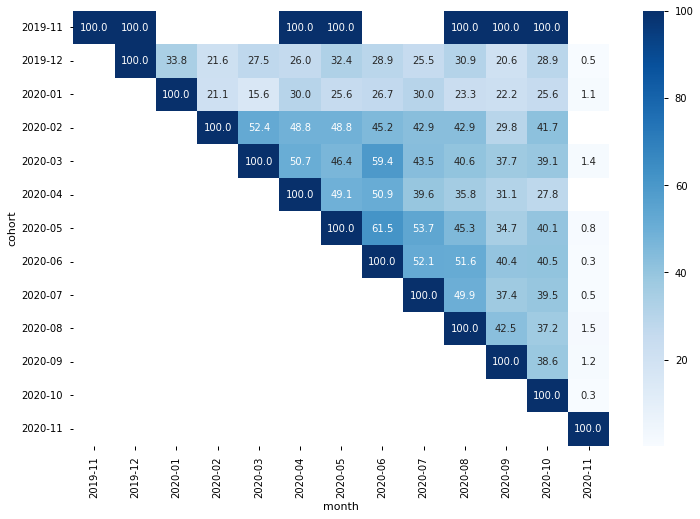

In [1837]:
retention_rate = cohort_clients_monthly.pivot(index='cohort', columns='month', values='n_clients')
retention_rate = retention_rate.div(cohort_clients, axis=0) * 100

plt.figure(figsize=(12,8))
sns.heatmap(retention_rate, annot=True, fmt='.1f', cmap='Blues')
plt.show();

## Churn Rate

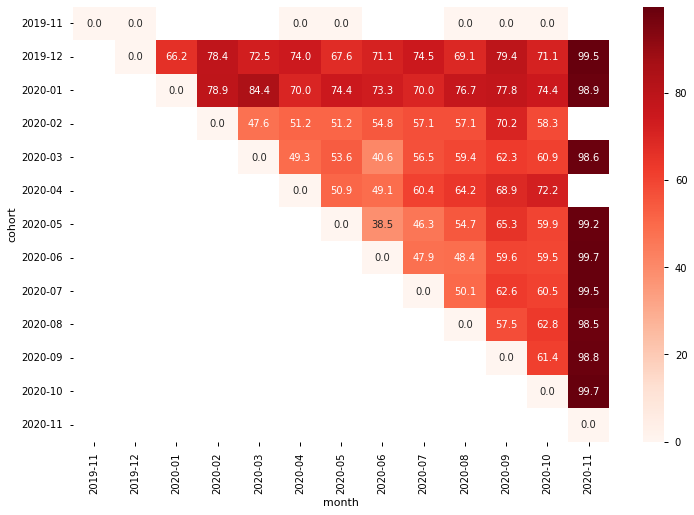

In [1838]:
churn_rate = 100 - retention_rate

plt.figure(figsize=(12,8))
sns.heatmap(churn_rate, annot=True, fmt='.1f', cmap='Reds')
plt.show();

# Dataset Transaction to Dataset Analytical

In [1839]:
# Drop first and last cohort from 'Cash' and 'Fee' dataframes due to lack of info
cohorts_to_drop = [['2019-11', '2020-11']]

cash = cash[~cash['cohort'].isin(cohorts_to_drop)]
fee = fee[~fee['cohort'].isin(cohorts_to_drop)]

In [1840]:
# Create a dataframe for Churn prediction

numerical_col = ['customer_id', 'total_trans', 'trans_amount', 
           'last_trans_date', 'recency', 'lifetime', 
           'avg_spent', 'total_fee', 'cohort', 'churn']

categorical_col = ['week_weekend', 'beg_mid_end_month', 'trans_status', 'trans_type', 'fee_type']

In [1841]:
# Calculate client-level metrics

df = cash.groupby('user_id').agg(
    total_trans=('id', 'count'),
    trans_amount=('amount','sum'),
    last_trans_date=('created_at', 'max'),
    first_trans_date=('created_at', 'min'),
    cohort=('cohort', 'min')
    ).reset_index()

df.rename(columns={'user_id':'customer_id', 'amount':'trans_amount'}, inplace=True)
df.head()

,customer_id,total_trans,trans_amount,last_trans_date,first_trans_date,cohort
0,34.0,1,100.0,2020-04-20 15:50:21.187257+00:00,2020-04-20 15:50:21.187257+00:00,2020-04
1,35.0,7,620.0,2020-09-19 10:25:54.265935+00:00,2019-12-13 20:27:38.106778+00:00,2019-12
2,47.0,8,232.0,2020-10-31 22:14:03.780126+00:00,2019-11-19 13:57:53.511561+00:00,2019-11
3,52.0,4,140.0,2020-09-19 12:58:37.167509+00:00,2019-12-17 09:01:12.584634+00:00,2019-12
4,53.0,4,400.0,2020-10-22 17:55:07.395663+00:00,2019-12-21 11:39:03.844436+00:00,2019-12


In [1842]:
# Calculate derivated metrics
df['recency'] = (max(df['last_trans_date']) - df['last_trans_date']).dt.days
df['lifetime'] = (df['last_trans_date'] - df['first_trans_date']).dt.days
df['avg_amount'] = df['trans_amount'] / df['total_trans']
df.head()

,customer_id,total_trans,trans_amount,last_trans_date,first_trans_date,cohort,recency,lifetime,avg_amount
0,34.0,1,100.0,2020-04-20 15:50:21.187257+00:00,2020-04-20 15:50:21.187257+00:00,2020-04,195,0,100.000000
1,35.0,7,620.0,2020-09-19 10:25:54.265935+00:00,2019-12-13 20:27:38.106778+00:00,2019-12,43,280,88.571429
2,47.0,8,232.0,2020-10-31 22:14:03.780126+00:00,2019-11-19 13:57:53.511561+00:00,2019-11,1,347,29.000000
3,52.0,4,140.0,2020-09-19 12:58:37.167509+00:00,2019-12-17 09:01:12.584634+00:00,2019-12,43,277,35.000000
4,53.0,4,400.0,2020-10-22 17:55:07.395663+00:00,2019-12-21 11:39:03.844436+00:00,2019-12,10,306,100.000000


In [1843]:
df.head()

,customer_id,total_trans,trans_amount,last_trans_date,first_trans_date,cohort,recency,lifetime,avg_amount
0,34.0,1,100.0,2020-04-20 15:50:21.187257+00:00,2020-04-20 15:50:21.187257+00:00,2020-04,195,0,100.000000
1,35.0,7,620.0,2020-09-19 10:25:54.265935+00:00,2019-12-13 20:27:38.106778+00:00,2019-12,43,280,88.571429
2,47.0,8,232.0,2020-10-31 22:14:03.780126+00:00,2019-11-19 13:57:53.511561+00:00,2019-11,1,347,29.000000
3,52.0,4,140.0,2020-09-19 12:58:37.167509+00:00,2019-12-17 09:01:12.584634+00:00,2019-12,43,277,35.000000
4,53.0,4,400.0,2020-10-22 17:55:07.395663+00:00,2019-12-21 11:39:03.844436+00:00,2019-12,10,306,100.000000


In [1844]:
# Metrics from fee 

# Total fee per customer
df_fee = fee.groupby('user_id')['total_amount'].agg(total_fee='sum')
df = df.merge(df_fee, right_on='user_id', left_on='customer_id', how='left')
df['total_fee'].fillna(0, inplace=True)

/tmp/ipykernel_989/4130432206.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_fee'].fillna(0, inplace=True)


In [1845]:
# Fee types
def categorical_feature(df, column, name):
    df_new = df.groupby(['user_id', column])[column].count().reset_index(name=name)
    df_piv = df_new.pivot_table(index='user_id', columns=column, values=name, fill_value=0).reset_index()
    return df_piv

df_fee_status = categorical_feature(fee, 'status', 'status_fee')
df_cash_status = categorical_feature(cash, 'status', 'status_cash')
df_cash_transfer_type = categorical_feature(cash, 'transfer_type', 'trans_type')
df_fee_type = categorical_feature(fee, 'type', 'fee_type')
df_fee_type.head()

type,user_id,incident,instant_payment,postpone
0,47.0,0.0,4.0,6.0
1,52.0,0.0,2.0,0.0
2,53.0,0.0,1.0,0.0
3,72.0,1.0,1.0,3.0
4,73.0,0.0,2.0,0.0


In [1846]:
# Hyperparameters of week_weekend and beginning, middle and end of month
cash['day_month'] = cash['created_at'].dt.day
cash['day_week'] = cash['created_at'].dt.weekday

cash['beg_mid_end'] = cash['day_month'].apply(lambda x: 'beginnig' if x <= 10 else 'end' if x >= 21 else 'middle')
cash['week_weekend'] = cash['day_week'].apply(lambda x: 'weekend' if x >= 6 else 'week')

df_cash_month_day = categorical_feature(cash, 'beg_mid_end', 'beg_mid_end_cash')
df_weekday = categorical_feature(cash, 'week_weekend', 'weekday')

In [1847]:
# Merge of all categorical columns
df_to_merge = [df_fee_status,
               df_cash_status, 
               df_cash_transfer_type,
               df_fee_type,
               df_cash_month_day,
               df_weekday]

def add_suffix(df, suffix, column_exception):
    df.rename(columns=lambda col: col + suffix if col != column_exception else col, inplace=True)
    return df

df_fee_status = add_suffix(df_fee_status, '_fee', 'user_id')
df_cash_status = add_suffix(df_cash_status, '_cash', 'user_id')
df_cash_transfer_type = add_suffix(df_cash_transfer_type, '_cash', 'user_id')
df_fee_type = add_suffix(df_fee_type, '_fee', 'user_id')

In [1848]:
def batch_merge(df_base, df_extra, left_on, right_on):
    df_merged = df_base.merge(df_extra, left_on=left_on, right_on=right_on, how='left').fillna(0)
    df_merged.drop(columns=right_on, inplace=True)
    return df_merged

# Copy original dataframe
df_merged = df.copy()

# Apply batch merge
for df_extra in df_to_merge:
    df_merged = batch_merge(df_merged, df_extra, 'customer_id', 'user_id')

# Get final Dataframe
df_merged.head()

,customer_id,total_trans,trans_amount,last_trans_date,first_trans_date,cohort,recency,lifetime,avg_amount,total_fee,...,instant_cash,regular_cash,incident_fee,instant_payment_fee,postpone_fee,beginnig,end,middle,week,weekend
0,34.0,1,100.0,2020-04-20 15:50:21.187257+00:00,2020-04-20 15:50:21.187257+00:00,2020-04,195,0,100.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,35.0,7,620.0,2020-09-19 10:25:54.265935+00:00,2019-12-13 20:27:38.106778+00:00,2019-12,43,280,88.571429,0.0,...,2.0,5.0,0.0,0.0,0.0,0.0,3.0,4.0,7.0,0.0
2,47.0,8,232.0,2020-10-31 22:14:03.780126+00:00,2019-11-19 13:57:53.511561+00:00,2019-11,1,347,29.000000,50.0,...,4.0,4.0,0.0,4.0,6.0,1.0,2.0,5.0,8.0,0.0
3,52.0,4,140.0,2020-09-19 12:58:37.167509+00:00,2019-12-17 09:01:12.584634+00:00,2019-12,43,277,35.000000,10.0,...,2.0,2.0,0.0,2.0,0.0,0.0,0.0,4.0,4.0,0.0
4,53.0,4,400.0,2020-10-22 17:55:07.395663+00:00,2019-12-21 11:39:03.844436+00:00,2019-12,10,306,100.000000,5.0,...,1.0,3.0,0.0,1.0,0.0,0.0,3.0,1.0,3.0,1.0


### Treat Categorical Data

In [1849]:
from sklearn import preprocessing 
  
# Label Encoding the cohort data
label_encoder = preprocessing.LabelEncoder() 
  
df_merged['cohort']= label_encoder.fit_transform(df_merged['cohort']) 
df_merged['cohort'].value_counts()

cohort
11    4694
10    1712
7     1338
8     1294
9      656
6      369
5      212
1      204
2       90
3       84
12      75
4       69
0        1
Name: count, dtype: int64

### Set Churn Period (> 90 days from last use)

<Axes: xlabel='churn'>

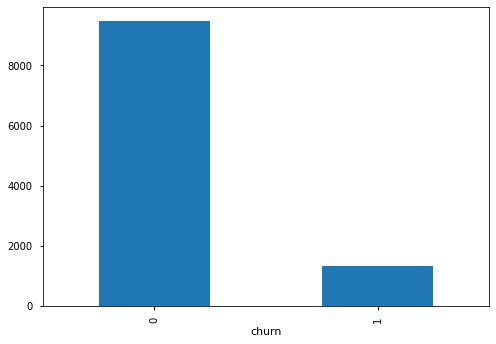

In [1850]:
# Establish Churn
churn_threshold = 90

df_merged['churn'] = df_merged['recency'].apply(lambda x: 1 if x > churn_threshold else 0)

df_merged['churn'].value_counts().plot(kind='bar')

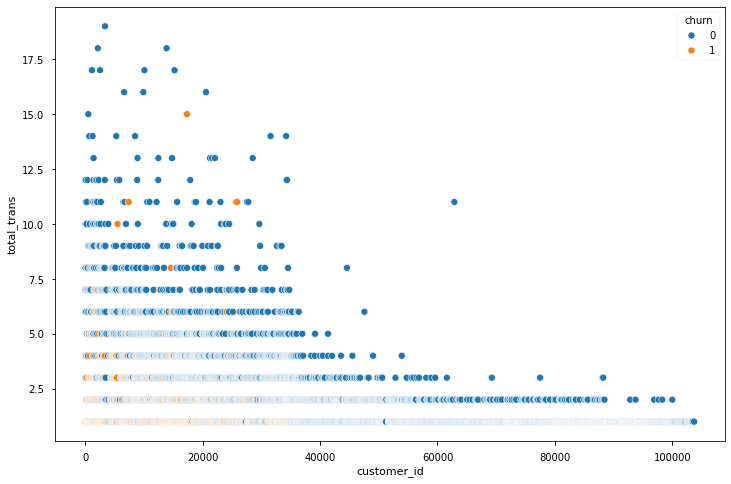

In [1851]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_merged, x='customer_id', y='total_trans', hue='churn')
plt.show()

The data is imbalanced, we'll need to approach it when applying classifier models

## Correlation

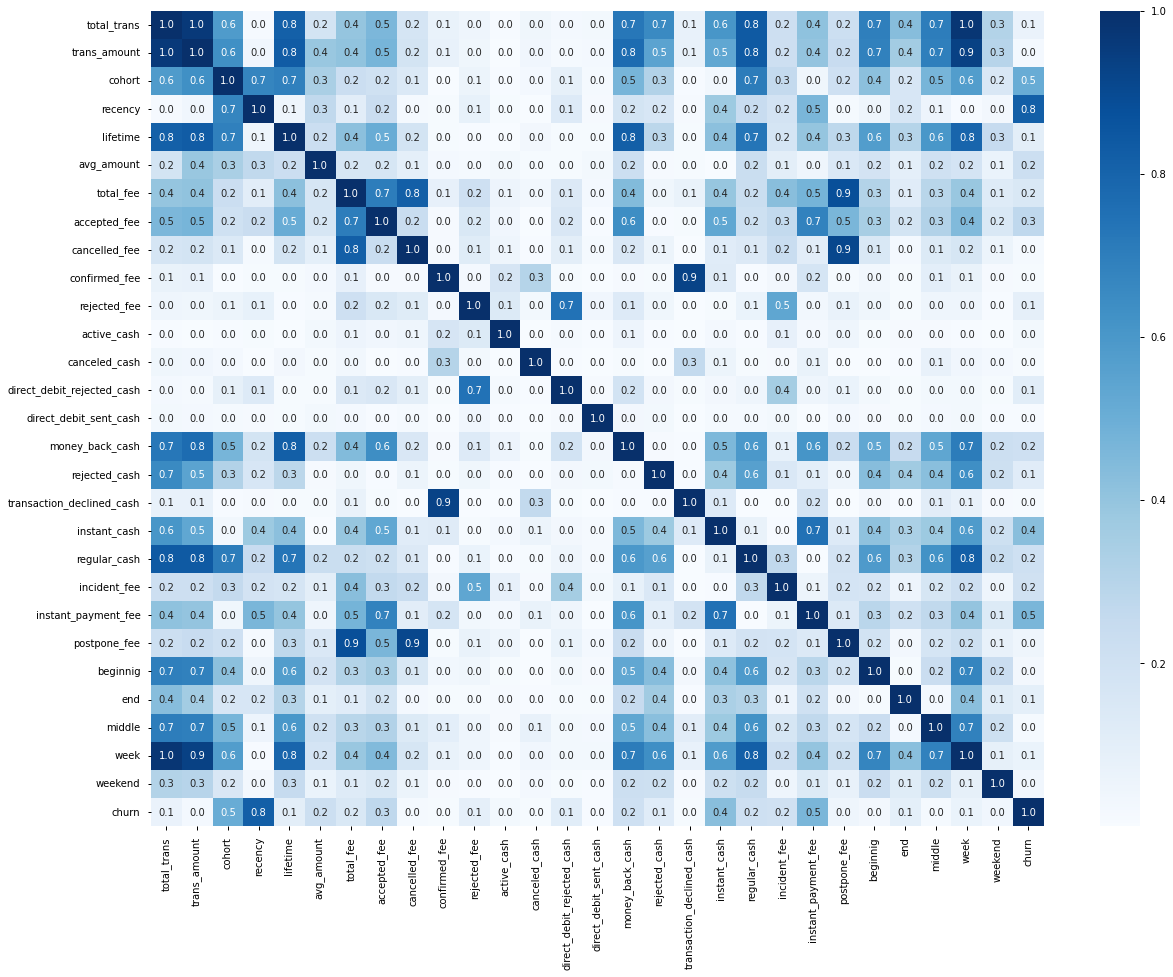

In [1852]:
# Copy the dataframe and remove non-relevant columns
df_churn = df_merged.drop(columns=['last_trans_date', 'first_trans_date', 'customer_id']).copy()

# Create correlation matrix
corr_matrix = np.abs(df_churn.corr())

# Plot the matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt=".1f")
plt.show()

We aim to remove the following columns:
* Weakly correlated with target `churn` (simplify the model since they don't add value)
* Highly correlated with each other (multicolinearty: redundant information -> risk of overfitting)

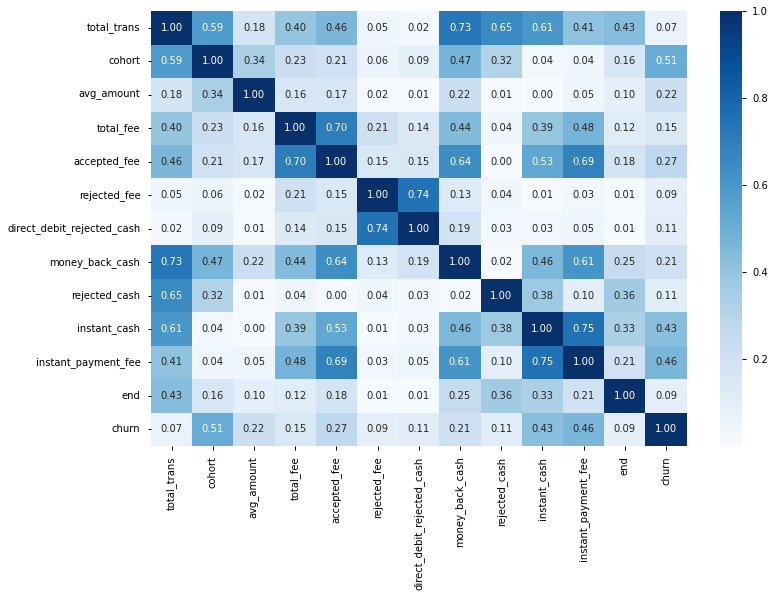

In [1853]:
# Drop low correlated columns with target 'churn'
low_threshold = 0.05
target_corr = corr_matrix['churn']
low_corr_columns = target_corr[target_corr < low_threshold].index.tolist()

# Drop high correlated columns
high_threshold = 0.85
# Select manually the columns
high_corr_columns = ['week', 'postpone_fee', 'transaction_declined_cash', 'trans_amount', 'incident_fee', 'lifetime', 'regular_cash', 'recency']

# Updated correlation matrix
corr_matrix_updated = np.abs(df_churn.drop(columns=high_corr_columns + low_corr_columns).corr())

# Plot the matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_updated, cmap='Blues', annot=True, fmt=".2f")
plt.show()

In [1854]:
# Remove the low and high correlated columns from dataframe
df_model = df_churn.drop(columns=low_corr_columns + high_corr_columns)
df_model.head()

,total_trans,cohort,avg_amount,total_fee,accepted_fee,rejected_fee,direct_debit_rejected_cash,money_back_cash,rejected_cash,instant_cash,instant_payment_fee,end,churn
0,1,5,100.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,7,1,88.571429,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,3.0,0
2,8,0,29.000000,50.0,6.0,0.0,0.0,6.0,1.0,4.0,4.0,2.0,0
3,4,1,35.000000,10.0,2.0,0.0,0.0,4.0,0.0,2.0,2.0,0.0,0
4,4,1,100.000000,5.0,1.0,0.0,0.0,4.0,0.0,1.0,1.0,3.0,0


## PCA to visualize Churn

<Axes: xlabel='PCA1', ylabel='PCA2'>

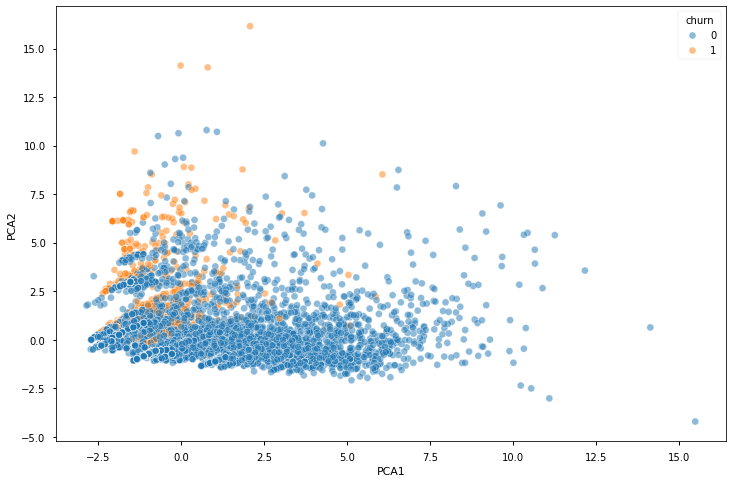

In [1855]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_model.drop(columns='churn')
y = df_model['churn']

# Standarise the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['churn'] = y

# Plot the PCA scatterplot
plt.figure(figsize=(12,8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='churn', alpha=0.5)


# Split the dataset
Since dataset has ≈ 10.000 samples, the split will be:
* Train Set: 80%
* Validation Set: 20%
* Test Set: 80%

In [1856]:
from sklearn.model_selection import train_test_split

# Global parameters
random_state = 39

# Split the dataset
X = df_model.drop(columns='churn')
y = df_model['churn']

# Test data: reserved for final evaluation
# Stratify parameter ensures a balanced split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Validation data:  reserved to test model
# Stratify parameter ensures a balanced split of the dataset
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_train, y_train, test_size=0.25, random_state=random_state, stratify=y_train)
print(X_train_model.shape, X_test_model.shape)
print(y_train_model.shape, y_test_model.shape)

(8638, 12) (2160, 12)
(8638,) (2160,)
(6478, 12) (2160, 12)
(6478,) (2160,)


* `X_train_model` / `y_train_model` for training the model
* `X_test_model` / `y_test_model` for model validation
* `X_test` / `y_test` for final evaluation

# Classifiers Models

In [1857]:
# Load the libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight

## Create a Model Evaluation Pipeline

In [1858]:
# Evaluation Function
def evaluate_model(y_test, y_pred, y_prob, model_name):
    
    # Calculate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_plot.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    
    print(f"\n{model_name} Results:")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve: {model_name}', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.show()

## 1. Logistic Regression

In [1859]:
# Step 1: Scale the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_model_scaled = scaler.fit_transform(X_train_model)

# Standarise the data for LogisticRegression model
X_test_model_scaled = scaler.transform(X_test_model)
X_test_scaled = scaler.transform(X_test)

# Train the model
logr = LogisticRegression(class_weight='balanced', random_state=random_state, max_iter=1000)
logr.fit(X_train_model_scaled, y_train_model)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=39)

### 1.1 Test for Model Validation

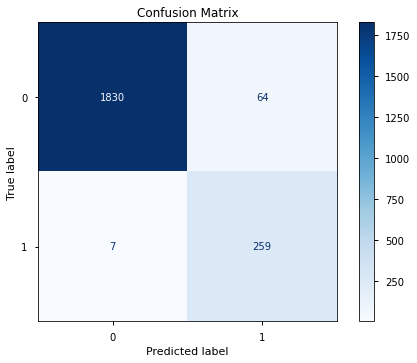


LogisticRegression Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1894
           1       0.80      0.97      0.88       266

    accuracy                           0.97      2160
   macro avg       0.90      0.97      0.93      2160
weighted avg       0.97      0.97      0.97      2160



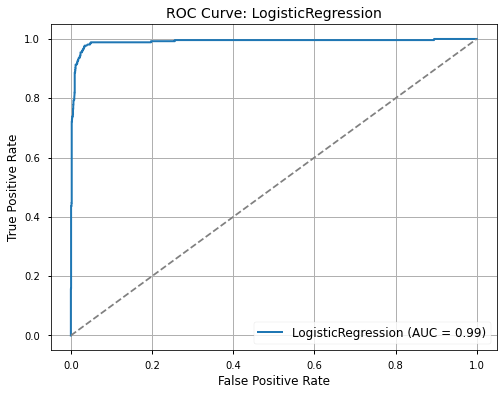

In [1860]:
# Evaluate the model on the validation data
y_val_pred = logr.predict(X_test_model_scaled)
y_val_prob = logr.predict_proba(X_test_model_scaled)[:, 1]

# Test for model validation
evaluate_model(y_test_model, y_val_pred, y_val_prob, 'LogisticRegression')

### 1.2 Test for Final Model Evaluation

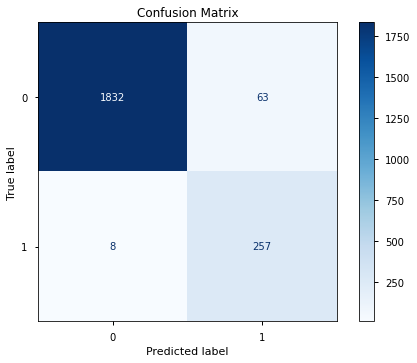


LogisticRegression Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1895
           1       0.80      0.97      0.88       265

    accuracy                           0.97      2160
   macro avg       0.90      0.97      0.93      2160
weighted avg       0.97      0.97      0.97      2160



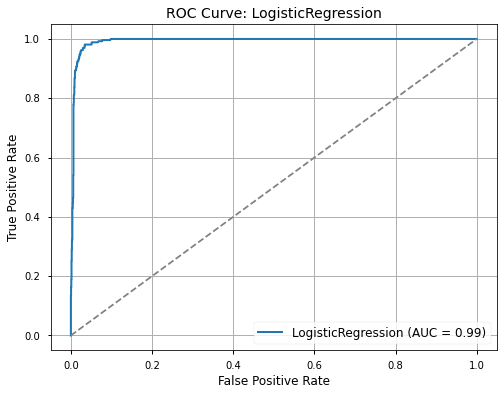

In [1861]:
# Evaluate the model on the final test data (optional)
y_test_pred = logr.predict(X_test_scaled)
y_test_prob = logr.predict_proba(X_test_scaled)[:, 1]

# Test for final evaluation
evaluate_model(y_test, y_test_pred, y_test_prob, 'LogisticRegression')

## 2. Random Forest

In [1862]:
# Load and train the model
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train_model, y_train_model)

RandomForestClassifier(class_weight='balanced', random_state=42)

### 1.1 Test for Model Validation

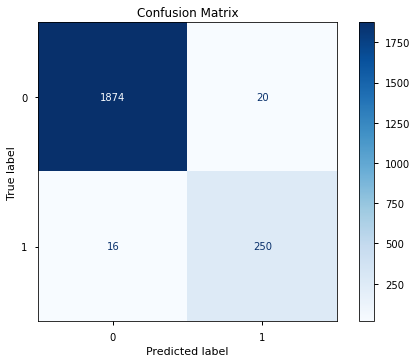


RandomForestClassifier Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1894
           1       0.93      0.94      0.93       266

    accuracy                           0.98      2160
   macro avg       0.96      0.96      0.96      2160
weighted avg       0.98      0.98      0.98      2160



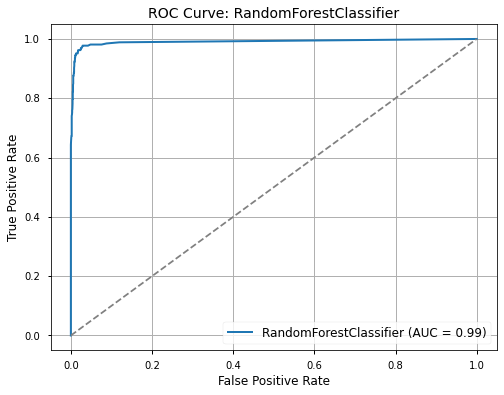

In [1863]:
# Evaluate the model on the validation data
y_val_pred = clf.predict(X_test_model)
y_val_prob = clf.predict_proba(X_test_model)[:, 1]

# Test for model validation
evaluate_model(y_test_model, y_val_pred, y_val_prob, 'RandomForestClassifier')

### 1.2 Test for Final Model Evaluation

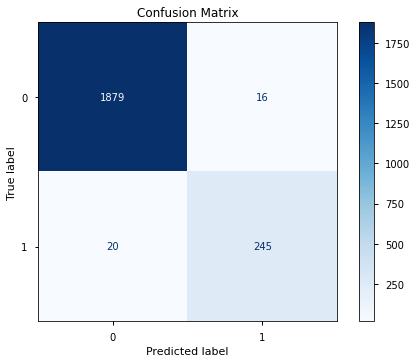


RandomForestClassifier Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1895
           1       0.94      0.92      0.93       265

    accuracy                           0.98      2160
   macro avg       0.96      0.96      0.96      2160
weighted avg       0.98      0.98      0.98      2160



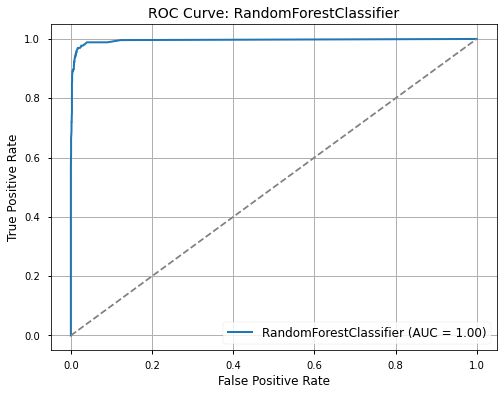

In [1864]:
# Evaluate the model on the validation data
y_test_pred = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)[:, 1]

# Test for model validation
evaluate_model(y_test, y_test_pred, y_test_prob, 'RandomForestClassifier')

# **Conclusions**

1. **Model Comparison**:
   - The **RandomForestRegressor** performs slightly better, with both models achieving over **95% accuracy**.

2. **Data Limitations**:
   - Despite the **high accuracy**, the models do not appear to be **overfitting**, suggesting they are well-generalized.
   - However, the dataset covers only **1 year**, which may limit capturing long-term churn trends.

3. **Feature Importance**:
   - **`Recency`** strongly correlates with churn, aligning with the 90-day threshold.

4. **Cohort Impact**:
   - Customer **cohorts** significantly affect churn predictions, highlighting the importance of segmentation.

